In [58]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
x = np.linspace(0, 10, 500)
y = np.cumsum(np.random.randn(500, 6), 0)

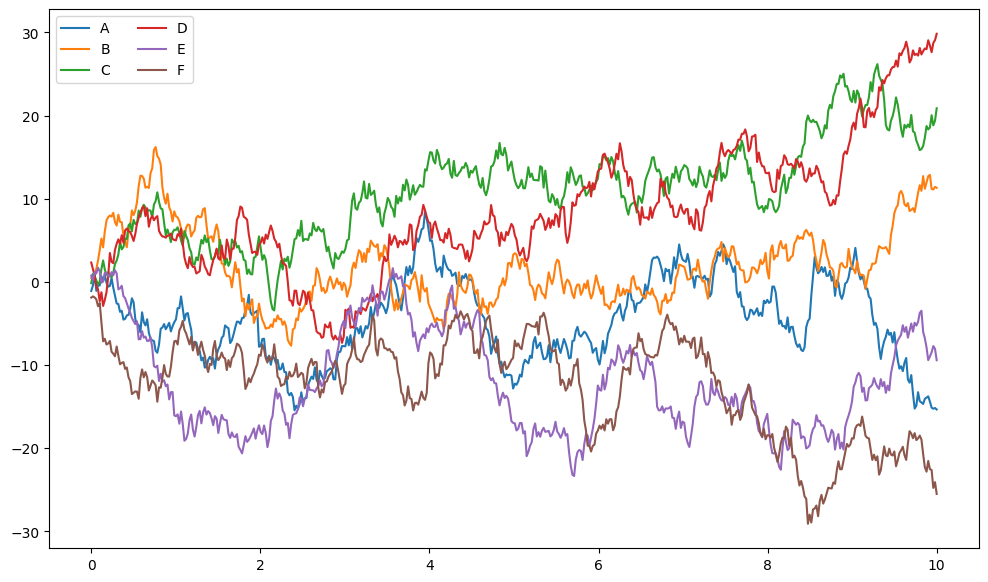

In [60]:
plt.figure(figsize=(12, 7))
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

Interacting with data

In [61]:
import requests
import pandas as pd

In [62]:
def get_historic_price(symbol, exchange='bitfinex', after='2018-09-01'):
    url = 'https://api.cryptowat.ch/markets/{exchange}/{symbol}usd/ohlc'.format(
        symbol=symbol, exchange=exchange)
    resp = requests.get(url, params={
        'periods': '3600',
        'after': str(int(pd.Timestamp(after).timestamp()))
    })
    resp.raise_for_status()
    data = resp.json()
    df = pd.DataFrame(data['result']['3600'], columns=[
        'CloseTime', 'OpenPrice', 'HighPrice', 'LowPrice', 'ClosePrice', 'Volume', 'NA'
    ])
    df['CloseTime'] = pd.to_datetime(df['CloseTime'], unit='s')
    df.set_index('CloseTime', inplace=True)
    return df

^ function that simplifies the process of importing data from Cryptowatch

 Pull data from Bitcoin and Ether for the last 7 days:

In [63]:
last_week = (pd.Timestamp.now() - pd.offsets.Day(7))
last_week

Timestamp('2023-08-23 23:38:39.015712')

In [64]:
btc = get_historic_price('btc', 'bitstamp', after=last_week)

In [65]:
eth = get_historic_price('eth', 'bitstamp', after=last_week)

Bitcoin

In [66]:
btc.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-08-24 00:00:00,26445,26532,26408,26431,115.123458,3.048923e+06
2023-08-24 01:00:00,26429,26532,26424,26509,52.047134,1.378567e+06
2023-08-24 02:00:00,26510,26523,26348,26348,75.119491,1.984667e+06
2023-08-24 03:00:00,26348,26409,26348,26371,8.956179,2.362800e+05
2023-08-24 04:00:00,26371,26441,26371,26438,13.066748,3.451787e+05


<Axes: xlabel='CloseTime'>

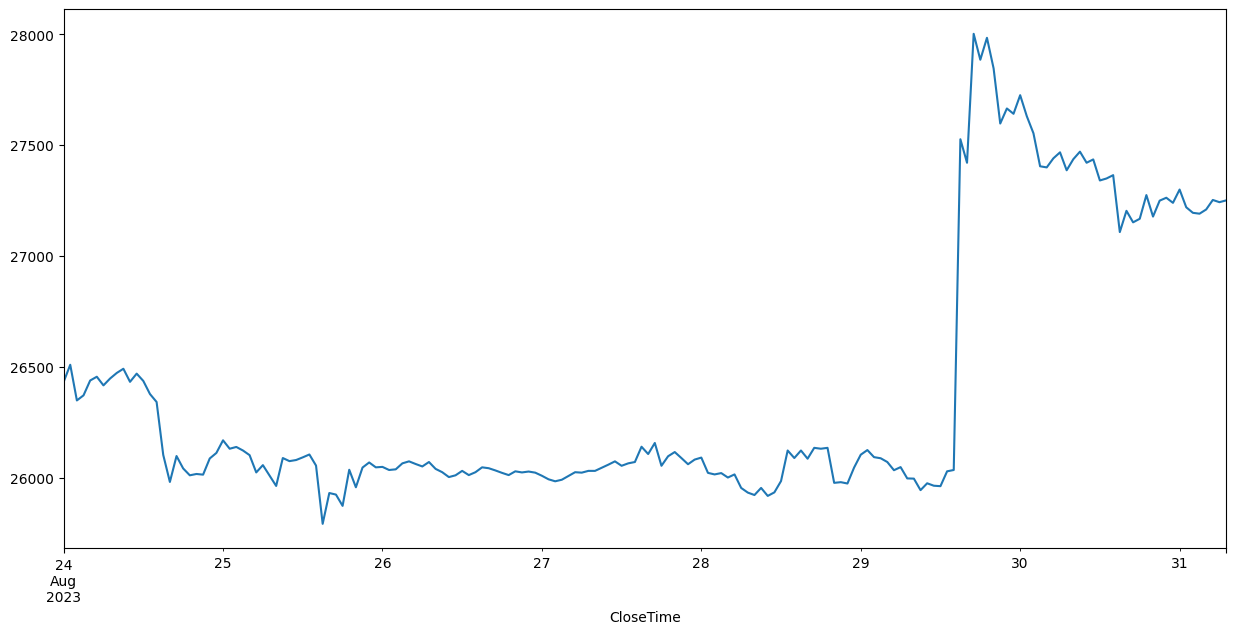

In [67]:
btc['ClosePrice'].plot(figsize=(15, 7))

Ether:

In [68]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-08-24 00:00:00,1675.3,1682.3,1674.7,1679.5,166.466218,279616.790569
2023-08-24 01:00:00,1679.7,1682.9,1679.1,1681.6,154.888456,260376.377507
2023-08-24 02:00:00,1681.8,1682.5,1672.7,1673.1,309.242973,518230.465013
2023-08-24 03:00:00,1673.3,1677.4,1672.4,1673.5,164.162107,274892.005188
2023-08-24 04:00:00,1673.8,1675.9,1672.9,1675.3,48.510436,81209.668528


<Axes: xlabel='CloseTime'>

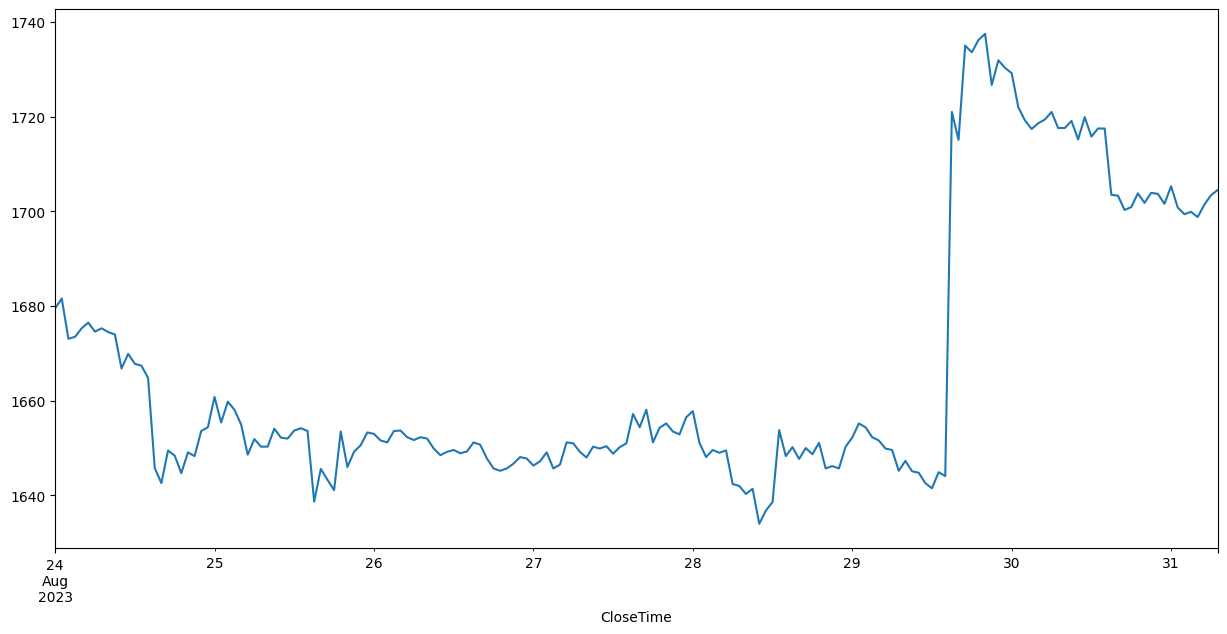

In [69]:
eth['ClosePrice'].plot(figsize=(15, 7))

In [70]:
eth.head()

,OpenPrice,HighPrice,LowPrice,ClosePrice,Volume,NA
CloseTime,,,,,,
2023-08-24 00:00:00,1675.3,1682.3,1674.7,1679.5,166.466218,279616.790569
2023-08-24 01:00:00,1679.7,1682.9,1679.1,1681.6,154.888456,260376.377507
2023-08-24 02:00:00,1681.8,1682.5,1672.7,1673.1,309.242973,518230.465013
2023-08-24 03:00:00,1673.3,1677.4,1672.4,1673.5,164.162107,274892.005188
2023-08-24 04:00:00,1673.8,1675.9,1672.9,1675.3,48.510436,81209.668528


Exporting to Excel:

Time to generate an Excel file from the downloaded prices. 
- Working with Excel and other formats like CSV or JSON is extremely simple in Jupyter Lab (thanks to pandas and Python). 

First step: Create an "Excel writer", a component from the pandas package:

In [71]:
import pandas as pd
writer = pd.ExcelWriter('cryptos.xlsx')

In [72]:
btc.to_excel(writer, sheet_name='Bitcoin') # write Bitcoin and Ether data as separate sheets:

In [73]:
eth.to_excel(writer, sheet_name='Ether')

In [ ]:
writer.save() 